In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

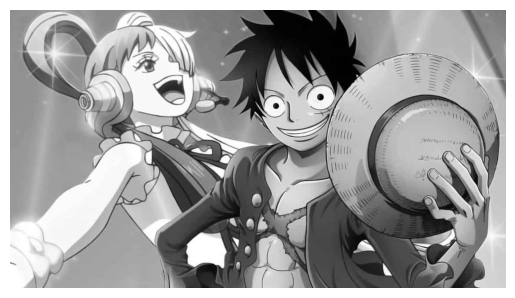

In [2]:
image = cv2.imread('The-One-Piece-Movies-In-Order-1-1140x641.jpg', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

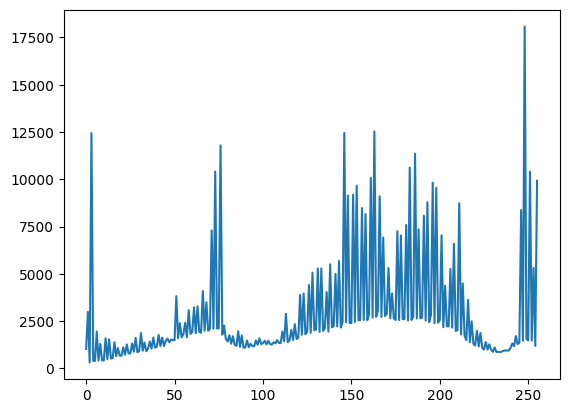

In [3]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)

In [4]:
equal_hist_image = cv2.equalizeHist(image)
# equal_hist = cv2.calcHist(equal_hist_image)

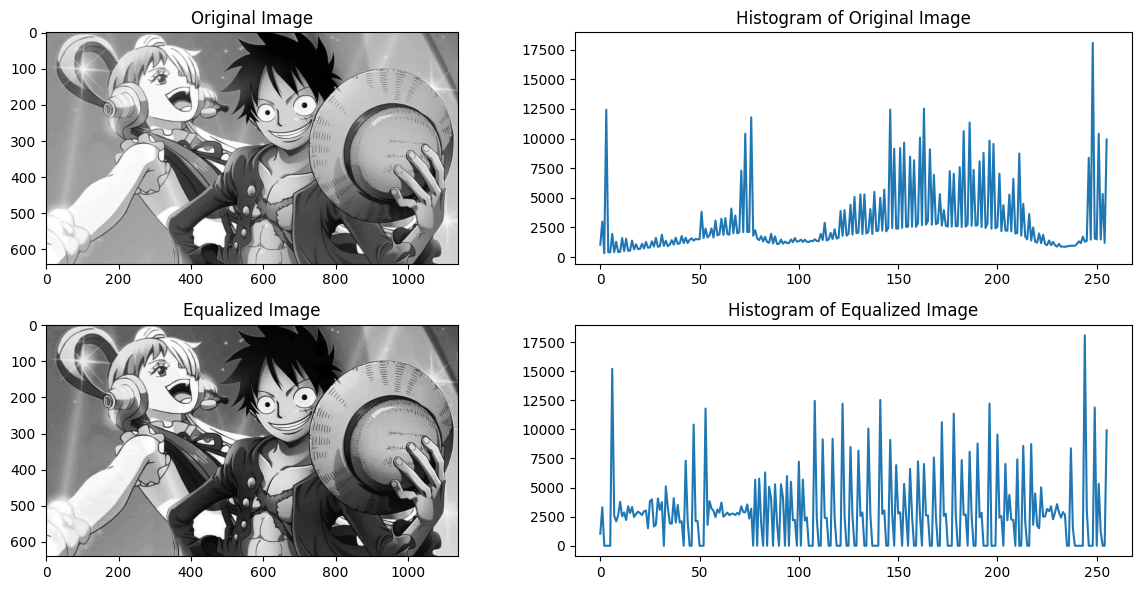

In [5]:
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
equalized_image = cv2.equalizeHist(image)
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the original image and its histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(original_hist)
plt.title('Histogram of Original Image')

# Display the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.subplot(2, 2, 4)
plt.plot(equalized_hist)
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

In [6]:
def compute_histograms(image, bin_size):
    histograms = []
    for row in range(0, image.shape[0], bin_size):
        for col in range(0, image.shape[1], bin_size):
            bin_row_end = min(row + bin_size, image.shape[0])
            bin_col_end = min(col + bin_size, image.shape[1])
            bin_image = image[row:bin_row_end, col:bin_col_end]
            hist = cv2.calcHist([bin_image], [0], None, [256], [0, 256])
            histograms.append((row, col, hist))
    return histograms

def reconstruct_image(histograms, image_size, bin_size):
    reconstructed = np.zeros(image_size, dtype=np.uint8)
    for row, col, hist in histograms:
        bin_row_end = min(row + bin_size, image_size[0])
        bin_col_end = min(col + bin_size, image_size[1])
        bin_image = np.zeros((bin_row_end - row, bin_col_end - col), dtype=np.uint8)
        cv2.normalize(hist, hist, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        cum_hist = np.cumsum(hist)
        for i in range(bin_image.shape[0]):
            for j in range(bin_image.shape[1]):
                intensity = np.searchsorted(cum_hist, np.random.rand() * cum_hist[-1])
                bin_image[i, j] = intensity
        reconstructed[row:bin_row_end, col:bin_col_end] = bin_image
    return reconstructed

## When Bin Size is 20

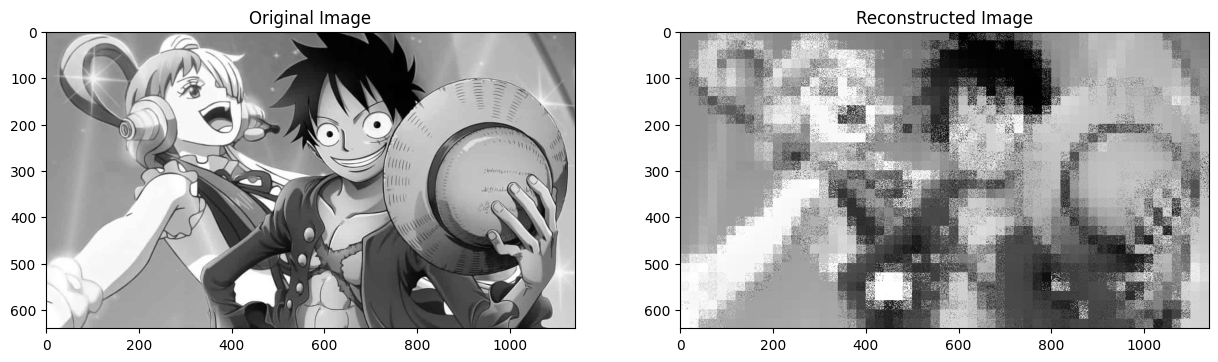

In [7]:
original_image = cv2.imread('The-One-Piece-Movies-In-Order-1-1140x641.jpg', cv2.IMREAD_GRAYSCALE)
bin_size = 20

histograms = compute_histograms(original_image, bin_size)
reconstructed_image = reconstruct_image(histograms, original_image.shape, bin_size)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.savefig('recon_bin20.png')
plt.title('Reconstructed Image')
plt.show()

## When Bin Size is 10

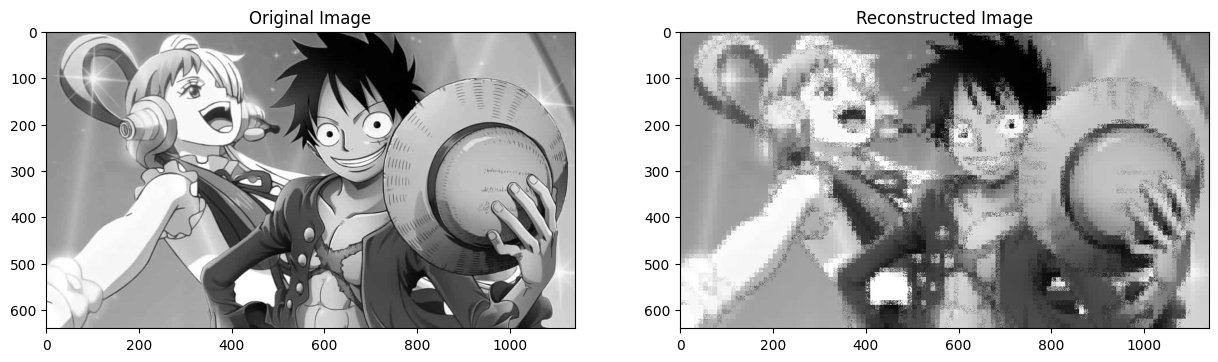

In [8]:
original_image = cv2.imread('The-One-Piece-Movies-In-Order-1-1140x641.jpg', cv2.IMREAD_GRAYSCALE)
bin_size = 10

histograms = compute_histograms(original_image, bin_size)
reconstructed_image = reconstruct_image(histograms, original_image.shape, bin_size)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.savefig('recon_bin10.png')
plt.title('Reconstructed Image')
plt.show()

## When Bin Size is 1 (For Exact Generation)

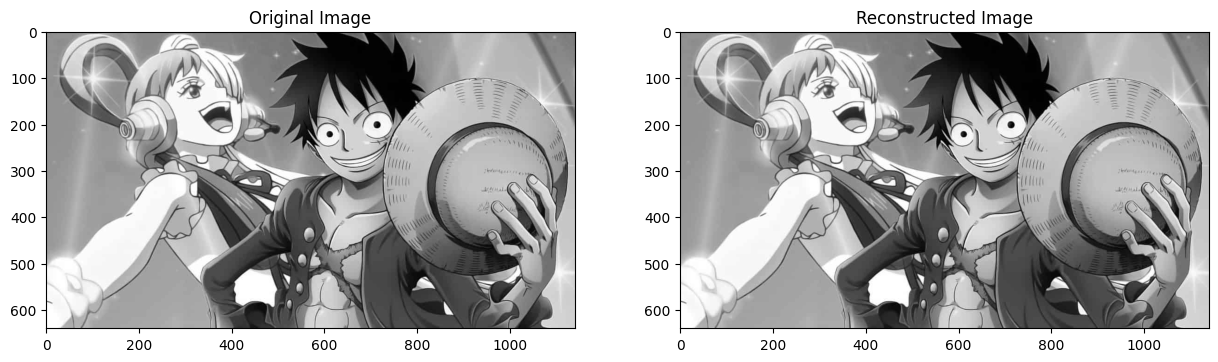

In [9]:
original_image = cv2.imread('The-One-Piece-Movies-In-Order-1-1140x641.jpg', cv2.IMREAD_GRAYSCALE)
bin_size = 1

histograms = compute_histograms(original_image, bin_size)
reconstructed_image = reconstruct_image(histograms, original_image.shape, bin_size)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.savefig('recon_bin1.png')
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

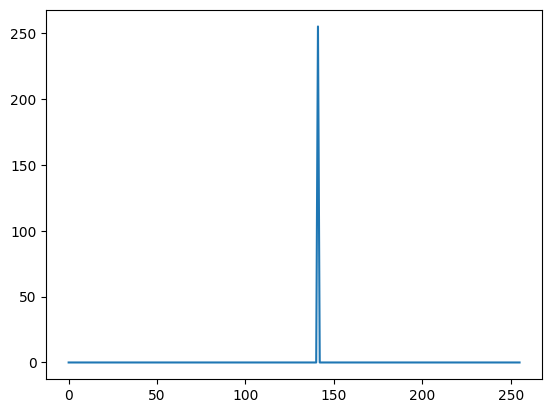

In [10]:
plt.plot(histograms[3][2])

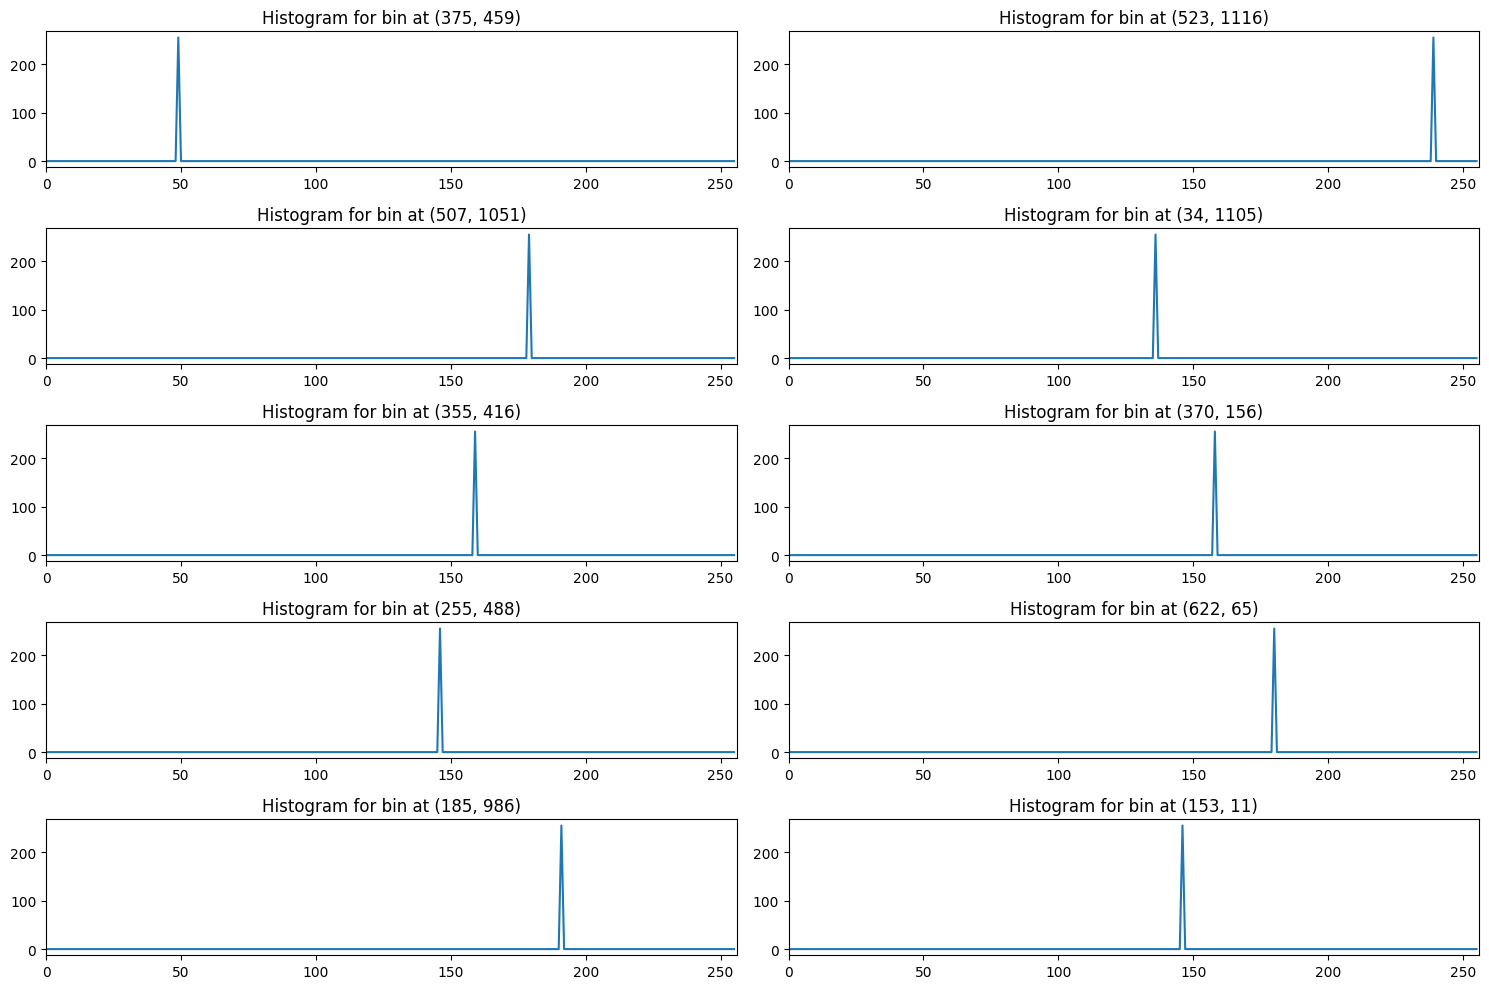

In [11]:
plt.figure(figsize=(15, 10))

for i in range(1, 11):
    # Randomly select a histogram
    row, col, hist = random.choice(histograms)
    plt.subplot(5, 2, i)
    plt.plot(hist)
    plt.title(f"Histogram for bin at ({row}, {col})")
    plt.xlim([0, 256])
plt.tight_layout()
plt.show()